# Crude Oil Price Prediction (Forecasting)

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']= 12,5
import seaborn as sns

In [114]:
data=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\crude oil\\crude.csv")
data.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,23-11-2016,47.96,47.94,48.43,47.40,556.86K,-0.0015
1,24-11-2016,47.98,48.03,48.26,47.80,0,0.0004
2,25-11-2016,46.06,47.97,48.26,45.88,465.98K,-0.0400
3,28-11-2016,47.08,45.43,47.65,45.14,734.38K,0.0221
4,29-11-2016,45.23,46.88,46.98,44.82,732.82K,-0.0393


In [115]:
data.tail()

,Date,Price,Open,High,Low,Volume,Chg%
1313,16-11-2021,80.76,80.93,81.81,80.03,325.67K,-0.0015
1314,17-11-2021,78.36,80.54,80.69,77.69,174.47K,-0.0297
1315,18-11-2021,79.01,78.34,79.36,77.08,83.98K,0.0083
1316,19-11-2021,76.10,78.76,79.92,75.37,30.70K,-0.0368
1317,22-11-2021,76.75,75.75,77.16,74.76,0,0.0085


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1318 non-null   object 
 1   Price   1318 non-null   float64
 2   Open    1318 non-null   float64
 3   High    1318 non-null   float64
 4   Low     1318 non-null   float64
 5   Volume  1318 non-null   object 
 6   Chg%    1318 non-null   float64
dtypes: float64(5), object(2)
memory usage: 72.2+ KB


In [117]:

data.describe()

,Price,Open,High,Low,Chg%
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000
mean,55.629879,55.637261,56.486343,54.724651,-0.001991
std,12.348480,12.203302,12.039665,12.480179,0.096436
min,-37.630000,-14.000000,13.690000,-40.320000,-3.059700
25%,48.852500,48.782500,49.592500,48.162500,-0.009975
50%,55.935000,55.955000,56.745000,55.020000,0.002100
75%,63.995000,64.045000,64.887500,63.310000,0.012300
max,84.650000,84.530000,85.410000,83.390000,0.376600


In [118]:
#parse string to the datetime type
data['Date']=pd.to_datetime(data['Date'], infer_datetime_format=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1318 non-null   datetime64[ns]
 1   Price   1318 non-null   float64       
 2   Open    1318 non-null   float64       
 3   High    1318 non-null   float64       
 4   Low     1318 non-null   float64       
 5   Volume  1318 non-null   object        
 6   Chg%    1318 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 72.2+ KB


In [119]:
data.corr()

,Price,Open,High,Low,Chg%
Price,1.000000,0.986792,0.990525,0.996918,0.209576
Open,0.986792,1.000000,0.996344,0.989670,0.099165
High,0.990525,0.996344,1.000000,0.987547,0.091718
Low,0.996918,0.989670,0.987547,1.000000,0.221893
Chg%,0.209576,0.099165,0.091718,0.221893,1.000000


<AxesSubplot:>

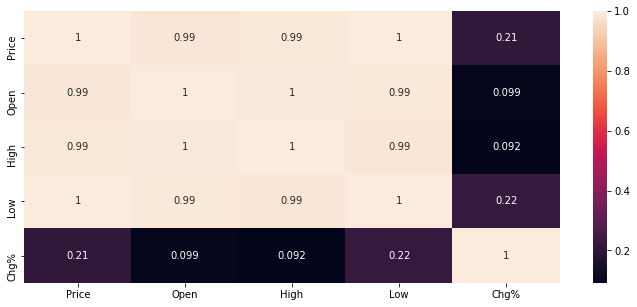

In [120]:
 sns.heatmap(data.corr(),annot=True)

### here as we want to forecast a price of crude oil and it is varrying day by day so we are selecting Price as a output variable with date as input variable. though open, high and low prices are correlated with price

In [121]:
# Remove all columns between column index 2 to 6
data.drop(data.iloc[:, 2:7], inplace = True, axis = 1)
  
data.head()

,Date,Price
0,2016-11-23,47.96
1,2016-11-24,47.98
2,2016-11-25,46.06
3,2016-11-28,47.08
4,2016-11-29,45.23


In [122]:
data["year"]=pd.DatetimeIndex(data["Date"]).year
data["month"]=pd.DatetimeIndex(data["Date"]).month


<AxesSubplot:xlabel='year', ylabel='Price'>

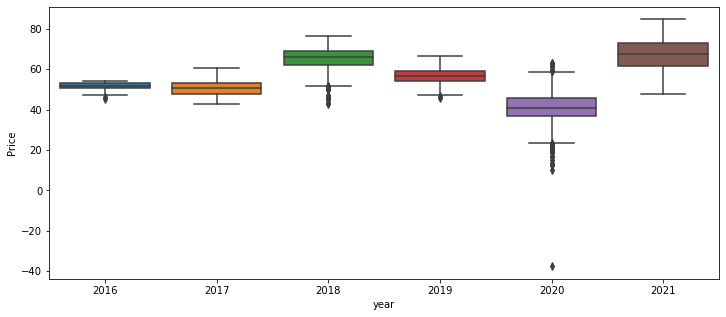

In [123]:
sns.boxplot(x="year",y="Price", data=data)

<AxesSubplot:xlabel='month', ylabel='year'>

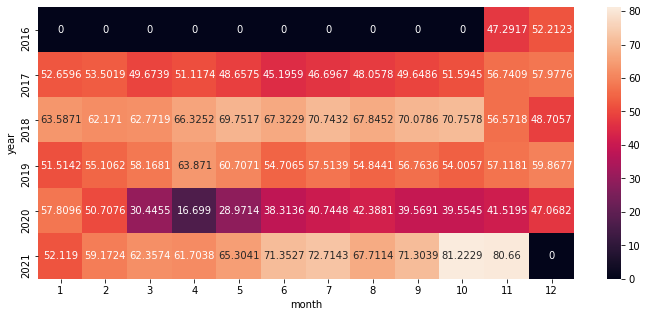

In [124]:
#plt.figure(figsize=(12,8))
heatmap=pd.pivot_table(data=data,values='Price',index='year',columns='month',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap,annot=True,fmt='g')

- As we have the data from nov_2016 to nov_2121 so it is showing zeros in the place whereas each entry is a mean of price of respective month.

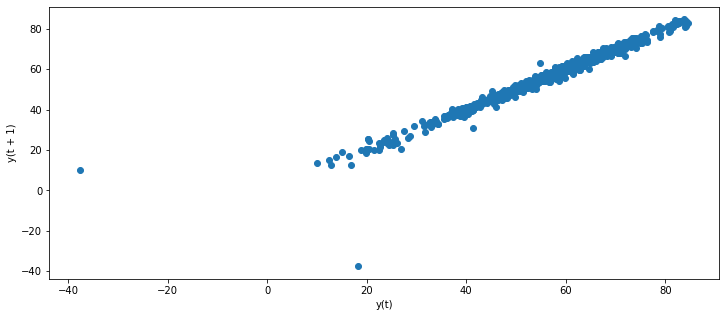

In [125]:
from pandas.plotting import lag_plot
lag_plot(data["Price"])
plt.show()

- here we can observe there is a linear relationship or positive relationship between the lags of output variable.

<AxesSubplot:>

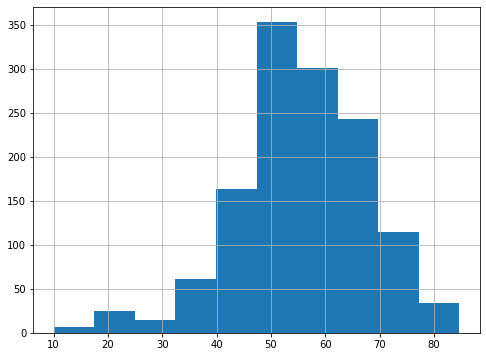

In [126]:
data=data[data['Price']>0]
data["Price"].hist(figsize=(8,6))

- Data is slight negatively skewed

In [127]:
data=data.set_index(['Date'])
data

,Price,year,month
Date,,,
2016-11-23,47.96,2016,11
2016-11-24,47.98,2016,11
2016-11-25,46.06,2016,11
2016-11-28,47.08,2016,11
2016-11-29,45.23,2016,11
...,...,...,...
2021-11-16,80.76,2021,11
2021-11-17,78.36,2021,11
2021-11-18,79.01,2021,11


In [128]:
data.drop(data.iloc[:, 1:4], inplace = True, axis = 1)
  
data.head()

,Price
Date,
2016-11-23,47.96
2016-11-24,47.98
2016-11-25,46.06
2016-11-28,47.08
2016-11-29,45.23


In [129]:
df=pd.date_range(start="23-11-2016", end="22-11-2021").difference(data.index)
df

DatetimeIndex(['2016-11-26', '2016-11-27', '2016-12-03', '2016-12-04',
               '2016-12-10', '2016-12-11', '2016-12-17', '2016-12-18',
               '2016-12-24', '2016-12-25',
               ...
               '2021-10-23', '2021-10-24', '2021-10-30', '2021-10-31',
               '2021-11-06', '2021-11-07', '2021-11-13', '2021-11-14',
               '2021-11-20', '2021-11-21'],
              dtype='datetime64[ns]', length=509, freq=None)

In [130]:
s=pd.Series(df)
s

0     2016-11-26
1     2016-11-27
2     2016-12-03
3     2016-12-04
4     2016-12-10
         ...    
504   2021-11-07
505   2021-11-13
506   2021-11-14
507   2021-11-20
508   2021-11-21
Length: 509, dtype: datetime64[ns]

In [131]:
s.index = pd.DatetimeIndex(s.index)

s = s.reindex(df, fill_value=0)
print(s)

2016-11-26    0
2016-11-27    0
2016-12-03    0
2016-12-04    0
2016-12-10    0
             ..
2021-11-07    0
2021-11-13    0
2021-11-14    0
2021-11-20    0
2021-11-21    0
Length: 509, dtype: object


In [132]:
frames = [data,s]
  
data_f = pd.concat(frames, axis=1, ignore_index=False)
display(data_f)

,Price,0
2016-11-23,47.96,NaN
2016-11-24,47.98,NaN
2016-11-25,46.06,NaN
2016-11-26,NaN,0
2016-11-27,NaN,0
...,...,...
2021-11-18,79.01,NaN
2021-11-19,76.10,NaN
2021-11-20,NaN,0
2021-11-21,NaN,0


In [133]:
data_f.index.name = 'Date'
data_f

,Price,0
Date,,
2016-11-23,47.96,NaN
2016-11-24,47.98,NaN
2016-11-25,46.06,NaN
2016-11-26,NaN,0
2016-11-27,NaN,0
...,...,...
2021-11-18,79.01,NaN
2021-11-19,76.10,NaN
2021-11-20,NaN,0


In [134]:
data_f.drop(data_f.iloc[:, 1:], inplace = True, axis = 1)
  
data_f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2016-11-23 to 2021-11-22
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1317 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


In [135]:
data_f['Price'].fillna(data_f['Price'].median(), inplace=True)
data_f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2016-11-23 to 2021-11-22
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1826 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


### Outlier Detection and Handeling by Capping and Flooring method

In [136]:
Q1=np.percentile(data_f,10, interpolation="midpoint")
Q3=np.percentile(data_f,90, interpolation="midpoint")


In [137]:
print(Q1, Q3)

42.89 68.67


In [138]:
data_f["Price"]=np.where(data_f["Price"]<Q1, Q1 , data_f["Price"])
data_f["Price"]=np.where(data_f["Price"]>Q3, Q3 , data_f["Price"])

<AxesSubplot:xlabel='Date'>

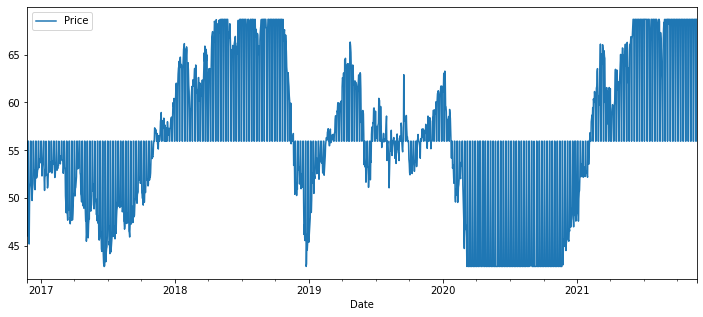

In [140]:
data_f.plot()

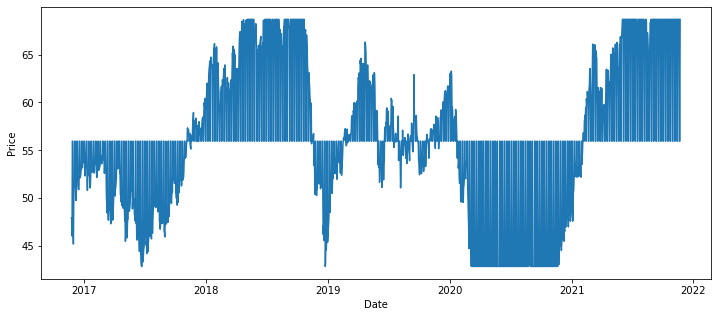

In [141]:
# Time plot
plt.xlabel('Date')
plt.ylabel('Price')

plt.plot(data_f)

### Here we can observe that after 2020 there is huge decrese in price of crude oil just due to covid so we can treate it as a outlier

## Stationarity Detection 

In [142]:
# Detemining a Rolling statistics of a year (window=7 days)
rolmean=data_f.rolling(window=7).mean()
rolstd=data_f.rolling(window=7).std()
print(rolmean, rolstd)

                Price
Date                 
2016-11-23        NaN
2016-11-24        NaN
2016-11-25        NaN
2016-11-26        NaN
2016-11-27        NaN
...               ...
2021-11-18  65.038571
2021-11-19  65.038571
2021-11-20  65.038571
2021-11-21  65.038571
2021-11-22  65.038571

[1826 rows x 1 columns]                Price
Date                
2016-11-23       NaN
2016-11-24       NaN
2016-11-25       NaN
2016-11-26       NaN
2016-11-27       NaN
...              ...
2021-11-18  6.201845
2021-11-19  6.201845
2021-11-20  6.201845
2021-11-21  6.201845
2021-11-22  6.201845

[1826 rows x 1 columns]


### Rolling method (visualization technique) 

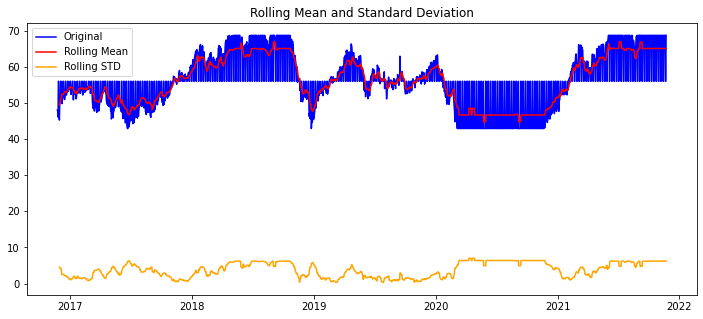

In [143]:
# Plot rolling statistics
original=plt.plot(data_f, color="Blue", label="Original")
mean=plt.plot(rolmean, color="Red", label="Rolling Mean")
std=plt.plot(rolstd, color="Orange", label="Rolling STD")

plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

- Here we can see that rooling mean and rolling std are varries alot hence we can conclude that dada is not stationary to confirm non_stationarity in data we will apply Dickey-Fuller test

### Dickey_Fuller Test 

In [144]:
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-Fuller test")
dftest=adfuller(data_f['Price'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test statistics', 'p_value', '#Lags Used', 'Number of observation used'])

for key, value in dftest[4].items():
    dfoutput['Criical Value(%s)' %key]=value
print(dfoutput)

Results of Dickey-Fuller test
Test statistics                 -1.506454
p_value                          0.530316
#Lags Used                      22.000000
Number of observation used    1803.000000
Criical Value(1%)               -3.433982
Criical Value(5%)               -2.863144
Criical Value(10%)              -2.567624
dtype: float64


###  Here we can observe p_value > 0.05, critical value > test statistics,  so we can conclude that our data is non-stationary¶


## Differencing Method to Remove seasonality 
#### Here we are going with sesonal defferece

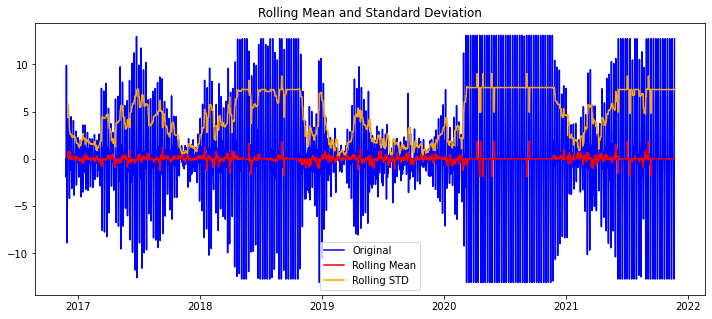

In [146]:
# We are taking seasonal difference by 1 day

data_diff=data_f["Price"]-data_f["Price"].shift()



rolmean_diff=data_diff.rolling(window=7).mean()
rolstd_diff=data_diff.rolling(window=7).std()


original=plt.plot(data_diff, color="Blue", label="Original")
mean=plt.plot(rolmean_diff, color="Red", label="Rolling Mean")
std=plt.plot(rolstd_diff, color="Orange", label="Rolling STD")

plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)


#plt.plot(data_diff)

In [147]:
data_diff.isna().sum()

1

In [148]:
data_diff.head()

Date
2016-11-23     NaN
2016-11-24    0.02
2016-11-25   -1.92
2016-11-26    9.90
2016-11-27    0.00
Freq: D, Name: Price, dtype: float64

In [149]:
data_diff.dropna(inplace=True)
data_diff

Date
2016-11-24     0.02
2016-11-25    -1.92
2016-11-26     9.90
2016-11-27     0.00
2016-11-28    -8.88
              ...  
2021-11-18     0.00
2021-11-19     0.00
2021-11-20   -12.71
2021-11-21     0.00
2021-11-22    12.71
Freq: D, Name: Price, Length: 1825, dtype: float64

In [150]:
# Deckey_Fuller to confirm stationarity

print("Results of Dickey-Fuller test")
dftest=adfuller(data_diff, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test statistics', 'p_value', '#Lags Used', 'Number of observation used'])

for key, value in dftest[4].items():
    dfoutput['Criical Value(%s)' %key]=value
print(dfoutput)

Results of Dickey-Fuller test
Test statistics              -1.022006e+01
p_value                       5.354051e-18
#Lags Used                    2.100000e+01
Number of observation used    1.803000e+03
Criical Value(1%)            -3.433982e+00
Criical Value(5%)            -2.863144e+00
Criical Value(10%)           -2.567624e+00
dtype: float64


### Here p_value < 0.05, test statistics value <  critical values. now we can say our data is stationary.


- Now we do seasonal decomposition  to find out trend, seasonality and residual.

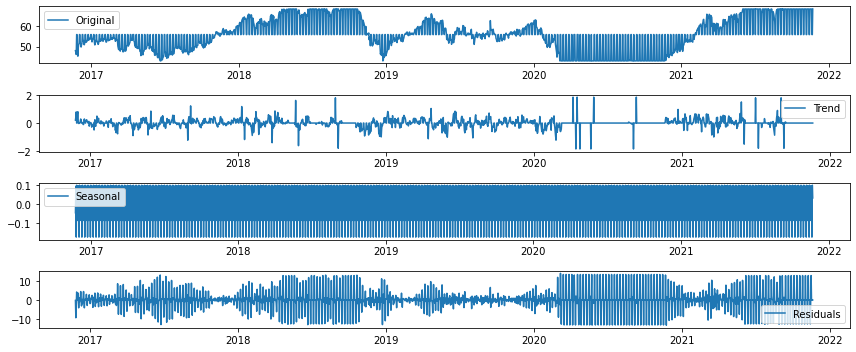

In [151]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(data_diff, period=7)
trend=decomposition.trend
seasonal=decomposition.seasonal
residuals=decomposition.resid

plt.subplot(411)
plt.plot(data_f, label='Original')
plt.legend(loc='best')


plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')


plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
decompose_data_diff=residuals
decompose_data_diff.dropna(inplace=True)

## Trend= Constant
## Seasonality= Additive
## Has residual in 2020 (covid period)

C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


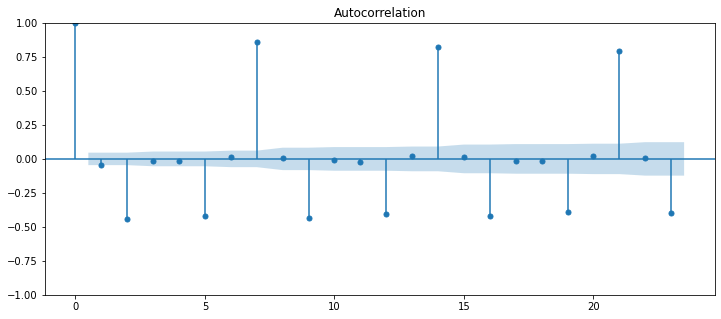

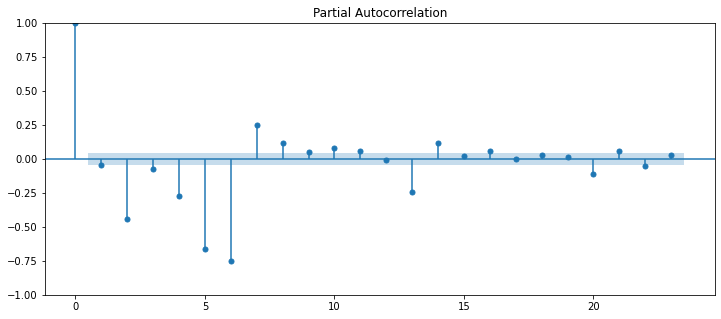

In [152]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data_diff,lags=23)
tsa_plots.plot_pacf(data_diff,lags=23)
plt.show()

### Train-Test split

In [185]:
train=data_f.iloc[:1771,:]
test=data_f.iloc[1771:,:]

In [186]:
print(train.shape, test.shape)

(1771, 1) (55, 1)


In [187]:
train.index

DatetimeIndex(['2016-11-23', '2016-11-24', '2016-11-25', '2016-11-26',
               '2016-11-27', '2016-11-28', '2016-11-29', '2016-11-30',
               '2016-12-01', '2016-12-02',
               ...
               '2021-09-19', '2021-09-20', '2021-09-21', '2021-09-22',
               '2021-09-23', '2021-09-24', '2021-09-25', '2021-09-26',
               '2021-09-27', '2021-09-28'],
              dtype='datetime64[ns]', name='Date', length=1771, freq='D')

In [188]:
test.index

DatetimeIndex(['2021-09-29', '2021-09-30', '2021-10-01', '2021-10-02',
               '2021-10-03', '2021-10-04', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10',
               '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14',
               '2021-10-15', '2021-10-16', '2021-10-17', '2021-10-18',
               '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22',
               '2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26',
               '2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03',
               '2021-11-04', '2021-11-05', '2021-11-06', '2021-11-07',
               '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11',
               '2021-11-12', '2021-11-13', '2021-11-14', '2021-11-15',
               '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-20', '2021-11-21', '2021-11-22'],
              dtype

# SARIMA Model building

In [189]:
import statsmodels.api as sm

In [158]:
import itertools
p=d=q=range(0,2)

pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

print('Example of parameter combination for seasonal arima')
print('SARIMAX: {} x {} '.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {} '.format(pdq[2],seasonal_pdq[2]))
print('SARIMAX: {} x {} '.format(pdq[3],seasonal_pdq[3]))
print('SARIMAX: {} x {} '.format(pdq[4],seasonal_pdq[4]))
print('SARIMAX: {} x {} '.format(pdq[5],seasonal_pdq[5]))

Example of parameter combination for seasonal arima
SARIMAX: (0, 0, 1) x (0, 0, 1, 12) 
SARIMAX: (0, 1, 0) x (0, 1, 0, 12) 
SARIMAX: (0, 1, 1) x (0, 1, 1, 12) 
SARIMAX: (1, 0, 0) x (1, 0, 0, 12) 
SARIMAX: (1, 0, 1) x (1, 0, 1, 12) 


In [159]:
results_dict=dict()

for pm in pdq:
    for pm_seasonal in seasonal_pdq:
        try:
            model=sm.tsa.statespace.SARIMAX(data_f,
                                           order=pm,
                                           seasonal_order=pm_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results=model.fit()
            print('ARIMA {} x {} 12- AIC:{}'.format(pm,pm_seasonal,results.aic))
            results_dict.update({(pm,pm_seasonal):results.aic})
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12) 12- AIC:19910.561717280623
ARIMA (0, 0, 0) x (0, 0, 1, 12) 12- AIC:17532.52539318805
ARIMA (0, 0, 0) x (0, 1, 0, 12) 12- AIC:12063.110061572816
ARIMA (0, 0, 0) x (0, 1, 1, 12) 12- AIC:11147.128671092798
ARIMA (0, 0, 0) x (1, 0, 0, 12) 12- AIC:12067.275050962162
ARIMA (0, 0, 0) x (1, 0, 1, 12) 12- AIC:11221.52109067082
ARIMA (0, 0, 0) x (1, 1, 0, 12) 12- AIC:11583.009420075501
ARIMA (0, 0, 0) x (1, 1, 1, 12) 12- AIC:11123.977401822527
ARIMA (0, 0, 1) x (0, 0, 0, 12) 12- AIC:17477.655684028177
ARIMA (0, 0, 1) x (0, 0, 1, 12) 12- AIC:15410.964153168155
ARIMA (0, 0, 1) x (0, 1, 0, 12) 12- AIC:11362.106823253522
ARIMA (0, 0, 1) x (0, 1, 1, 12) 12- AIC:10396.79661667051
ARIMA (0, 0, 1) x (1, 0, 0, 12) 12- AIC:11364.62929894248
ARIMA (0, 0, 1) x (1, 0, 1, 12) 12- AIC:10466.905286834204
ARIMA (0, 0, 1) x (1, 1, 0, 12) 12- AIC:10803.070664842773
ARIMA (0, 0, 1) x (1, 1, 1, 12) 12- AIC:10391.651832422947
ARIMA (0, 1, 0) x (0, 0, 0, 12) 12- AIC:10886.381721816515
A

C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 1) x (0, 0, 0, 12) 12- AIC:10530.003289465732
ARIMA (1, 0, 1) x (0, 0, 1, 12) 12- AIC:10019.439174656221
ARIMA (1, 0, 1) x (0, 1, 0, 12) 12- AIC:11335.71937283085
ARIMA (1, 0, 1) x (0, 1, 1, 12) 12- AIC:10393.701227550842
ARIMA (1, 0, 1) x (1, 0, 0, 12) 12- AIC:10296.618167586905
ARIMA (1, 0, 1) x (1, 0, 1, 12) 12- AIC:10019.589657082393
ARIMA (1, 0, 1) x (1, 1, 0, 12) 12- AIC:10795.545488276204
ARIMA (1, 0, 1) x (1, 1, 1, 12) 12- AIC:10369.167706214555
ARIMA (1, 1, 0) x (0, 0, 0, 12) 12- AIC:10885.22959809631
ARIMA (1, 1, 0) x (0, 0, 1, 12) 12- AIC:10300.045339136806
ARIMA (1, 1, 0) x (0, 1, 0, 12) 12- AIC:12684.59117617903
ARIMA (1, 1, 0) x (0, 1, 1, 12) 12- AIC:10809.058932643693
ARIMA (1, 1, 0) x (1, 0, 0, 12) 12- AIC:10482.72518778961
ARIMA (1, 1, 0) x (1, 0, 1, 12) 12- AIC:10302.045299734142
ARIMA (1, 1, 0) x (1, 1, 0, 12) 12- AIC:11636.55930229262
ARIMA (1, 1, 0) x (1, 1, 1, 12) 12- AIC:10482.604961672758
ARIMA (1, 1, 1) x (0, 0, 0, 12) 12- AIC:10299.862265452895
AR

In [190]:
model=sm.tsa.statespace.SARIMAX(train,
                                order=(4,1,4),
                                seasonal_order=(4,1,4,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_f=model.fit()
print(model_f.summary())

C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                 1771
Model:             SARIMAX(4, 1, 4)x(4, 1, 4, 12)   Log Likelihood               -3784.884
Date:                            Wed, 05 Jan 2022   AIC                           7603.767
Time:                                    00:37:53   BIC                           7696.270
Sample:                                11-23-2016   HQIC                          7638.007
                                     - 09-28-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8004      0.009     87.336      0.000       0.782       0.818
ar.L2         -1.4134      0.011   

#### We finalise the oreder and seasonal order where we get lower AIC value

### Predictions on testing data 

In [191]:
prediction=model_f.predict(start =pd.to_datetime("2021-09-29"), end =pd.to_datetime("2021-11-22"))


### MAPE calculation (To check Accuracy)

In [192]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(test, prediction))

0.0343367776128987


#### Training MAPE 

In [193]:
prediction_train=model_f.predict(start =pd.to_datetime("2016-11-23"), end =pd.to_datetime("2021-09-28"))


In [194]:

print(mean_absolute_percentage_error(train, prediction_train))

0.0322979482801847


#### Testing MAPE

In [195]:
prediction_test=model_f.predict(start =pd.to_datetime("2021-09-29"), end =pd.to_datetime("2021-11-22"))

In [196]:
print(mean_absolute_percentage_error(test, prediction_test))

0.0343367776128987


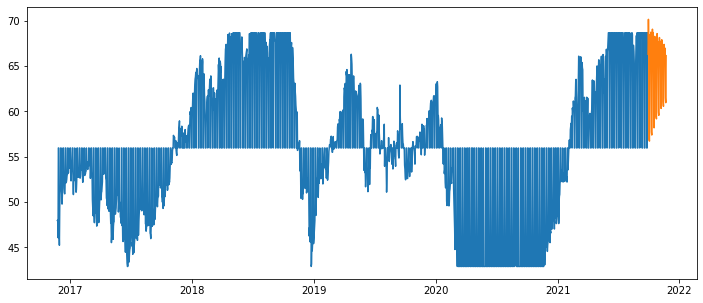

In [197]:
plt.plot(train)
plt.plot(prediction)

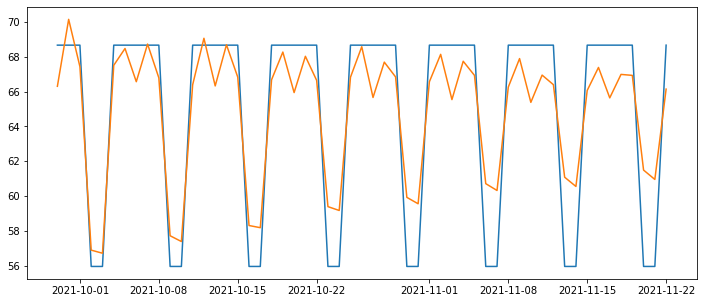

In [199]:
plt.plot(test)
plt.plot(prediction)

In [200]:
forecast=model_f.predict(start=pd.to_datetime("2021-12-20"), end=pd.to_datetime("2021-12-30"))
forecast

2021-12-20    65.961510
2021-12-21    66.839645
2021-12-22    65.408509
2021-12-23    66.318496
2021-12-24    66.710934
2021-12-25    63.735854
2021-12-26    62.483042
2021-12-27    65.863522
2021-12-28    66.845040
2021-12-29    65.359777
2021-12-30    65.854279
Freq: D, Name: predicted_mean, dtype: float64

### Addition of new dates to forecast  

In [201]:
from pandas.tseries.offsets import DateOffset
pred_date=[data.index[-1]+ DateOffset(days=x)for x in range(0,24)]

In [202]:
forecast = model_f.predict(start = pd.to_datetime("2021-11-23"), end = pd.to_datetime("2021-12-15"), dynamic=True)  
forecast

C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


2021-11-23    67.559071
2021-11-24    65.232423
2021-11-25    66.591920
2021-11-26    66.696124
2021-11-27    61.885781
2021-11-28    61.580391
2021-11-29    66.368710
2021-11-30    67.587059
2021-12-01    65.618715
2021-12-02    66.317841
2021-12-03    66.619824
2021-12-04    62.385377
2021-12-05    61.605117
2021-12-06    65.908347
2021-12-07    67.291438
2021-12-08    65.396778
2021-12-09    66.137320
2021-12-10    66.625266
2021-12-11    63.001137
2021-12-12    62.174725
2021-12-13    66.253887
2021-12-14    67.021076
2021-12-15    65.389596
Freq: D, Name: predicted_mean, dtype: float64

In [203]:
import pickle

In [204]:
with open("model_f_pickle", "wb") as f:
    pickle.dump(model_f,f)

In [205]:
with open("model_f_pickle", "rb") as f:
    mp=pickle.load(f)

In [206]:
mp.predict(start=pd.to_datetime("2021-12-20"), end=pd.to_datetime("2022-01-06"))

2021-12-20    65.961510
2021-12-21    66.839645
2021-12-22    65.408509
2021-12-23    66.318496
2021-12-24    66.710934
2021-12-25    63.735854
2021-12-26    62.483042
2021-12-27    65.863522
2021-12-28    66.845040
2021-12-29    65.359777
2021-12-30    65.854279
2021-12-31    66.501640
2022-01-01    63.816633
2022-01-02    62.703481
2022-01-03    65.898776
2022-01-04    67.035970
2022-01-05    65.600632
2022-01-06    66.223456
Freq: D, Name: predicted_mean, dtype: float64